In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Christian Melendez

I have used the following AI tools: None.

I understand that my submission needs to be my own work: CM

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

In Visual Studio Code: Use Export (click on ... in the menu bar) to save your notebook as a HTML file.

In Colab you need to save the notebook on GoogleDrive and then add the following block
```
!pip install nbconvert

from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/Copy\ of\ robot_vacuum.ipynb
```

You will need to fix the file location on your GoogleDrive.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [2]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [3]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'east'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`.

In [4]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [5]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: south
step 1 - action: west
step 2 - action: suck
step 3 - action: suck
step 4 - action: east
step 5 - action: suck
step 6 - action: south
step 7 - action: north
step 8 - action: suck
step 9 - action: north
step 10 - action: south
step 11 - action: north
step 12 - action: south
step 13 - action: west
step 14 - action: west
step 15 - action: east
step 16 - action: suck
step 17 - action: suck
step 18 - action: west
step 19 - action: west


6

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [6]:
# The environment calls the following variables:
# agent is the intelligent agent. The vacuum.
# max_steps is an integer for the total squares the agent will cover before running out of battery/stopping.
# room_size is an integer passed to set the NxN size of the environment.
# to_print is a boolean value that tells the environment whether or not to print the direction the agent moved. This is to help
#speed up the multiple runs for the analysis in Tasks 4 and 5.
# set_obstacles is a boolean value that decides whether or not to add obstacles to the
import numpy as np
def environment(agent, max_steps, room_size, to_print, set_obstacles, verbose = True):
    energy_spent = 0

    #The randomizer is taken from the notes you provided. I first create my NxN array and then make it dirty (1 = dirty) and add
    # obstacles (2 = obstacle).
    rng = np.random.default_rng()
    area_to_clean = [[0 for col in range(room_size)] for row in range(room_size)]
    for i in range(room_size):
      for j in range(room_size):
        dirty_obstacle_int = rng.random()
        if (dirty_obstacle_int < .2):
            area_to_clean[i][j] = 1
        elif (set_obstacles and dirty_obstacle_int < .4):
            area_to_clean[i][j] = 2

    # Declaring starting position
    row = np.random.randint(room_size)
    column = np.random.randint(room_size)

    # The below for loop is where the environment will be checked for cleanliness and the agent will be called.
    for i in range(max_steps):
        # First check if the room is still dirty and if the agent has to continue.
        row_checker_count = 0
        for row_checker in area_to_clean:
            if (1 in row_checker):
                break
            row_checker_count += 1
        if (row_checker_count == room_size):
            if (to_print): print("The whole room has been cleaned.")
            break

        # If the agent continues then first check if the spot it is on is dirty.
        if (area_to_clean[row][column] == 1): dirty = True
        else: dirty = False

        # Declare the bumpers dictionary and set all bumpers to False by default.
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        # Check if the agent is either at a wall or next to an obstacle.
        if (row == 0):
          bumpers["north"] = True
        elif (area_to_clean[row - 1][column] == 2):
          bumpers["north"] = True
        if (row == room_size - 1):
          bumpers["south"] = True
        elif (area_to_clean[row + 1][column] == 2):
          bumpers["south"] = True
        if (column == 0):
          bumpers["west"] = True
        elif(area_to_clean[row][column - 1] == 2):
          bumpers["west"] = True
        if (column == room_size - 1):
          bumpers["east"] = True
        elif(area_to_clean[row][column + 1] == 2):
          bumpers["east"] = True


        # Below is the actual calling of the agent and the handling of it's returns.
        action = agent(bumpers, dirty)

        # The energy spent will always equal the current iteration of the for loop.
        energy_spent = i

        # Do not print the current action and step count if to_print is false.
        if (to_print and verbose): print("step", i , "- action:", action)

        # This section updates the environment on the actions of the agent.
        if (action == "suck"):
            area_to_clean[row][column] = 0
            continue
        elif (action == "stuck"):
            if (to_print): print("The bot is stuck. Send help.")
            return(max_steps - 1)
        elif (bumpers[action]): continue
        elif (action == "north"): row -=1
        elif (action == "south"): row +=1
        elif (action == "west"): column -=1
        elif (action == "east"): column +=1
        elif (action == "done"):
            if (to_print): print("The whole room has been cleaned.")
            break

    return energy_spent

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [7]:
# "suck" has been removed from actions for the simple_reflex_agent because it will only suck when it sees dirt underneath it.
#It will not suck randomly.
actions = ["north", "east", "west", "south"]

# All agents will not be passed the bumpers dictionary and the boolean value for dirty.
def simple_reflex_agent(bumpers, dirty):
    # Clean if dirty.
    if dirty:
        return "suck"
    else:
        # Select a random action. If there are bumpers then instead pick a new random action until you are no longer blocked.
        action = np.random.choice(actions)
        while_counter = 0
        while (bumpers[action]):
            if (while_counter > 20): return("stuck")
            while_counter += 1
            action = np.random.choice(actions)
        return action

In [8]:
environment(simple_reflex_agent, max_steps = 1000, room_size = 5,to_print = False, set_obstacles = False)

31

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [9]:
# The Model_Based_Agent class will start in searching mode and then switch to cleaning mode once it has reached the desired starting position.
#It will also be able to track it's x and y coordinates after entering cleaning mode.
class Model_Based_Agent:
    def __init__(self):
        self.x_position = 0
        self.y_position = 0
        self.cleaning = False
        self.searching = True

    # The act() method will be how the environment calls the Model_Based_Agent with the bumpers dictionary and the dirty boolean.
    def act(self, bumpers, dirty):
        # First the agent looks for the top left corner of the room by first going all the way north and then all the way west.
        #Once it finds it then it will switch from searching mode to cleaning mode. Switching modes will not cost an action.
        if (self.searching):
            if (not bumpers["north"]): return("north")
            elif (not bumpers["west"]): return("west")
            else:
                self.searching = False
                self.cleaning = True
                print("I am now in cleaning mode.")

        # When in cleaning mode, the bot will check if it is in a dirty square first.
        if (dirty): return("suck")

        # If the agent is on a clean square and on an even row (array math so the top row is the 0th row and is therefore even) then it will
        #move east and if it is on a clean square and an odd row then it will go west. Once it hits a wall it will go south.
        # If the agent is stuck on a corner and the environment has not been fully cleaned then it will return "stuck". Will only occur with obstacles present.
        even_row = self.y_position % 2 == 0

        # This is the only part of the code that I had any assistance with. The below logic was completely written by me, however, the way I had it
        #written out didn't seem readable to me. I asked a senior developer for tips on how to make it more readable and he gave me tips like
        #"You don't need an else if or else if you're returning something." Again, he didn't change any of the logic, just helped with readability on this snippet.
        if (even_row):
            if (not bumpers["east"]):
                self.x_position += 1
                return("east")
            if (not bumpers["south"]):
                self.y_position += 1
                return("south")
        else:
            if(not bumpers["west"]):
                self.x_position -= 1
                return("west")
            if (not bumpers["south"]):
                self.y_position += 1
                return("south")
        return("stuck")


In [10]:
# Your code goes here
model_agent = Model_Based_Agent()

environment(model_agent.act, max_steps = 13000, room_size = 5, to_print = True, set_obstacles = False)

I am now in cleaning mode.
step 0 - action: east
step 1 - action: east
step 2 - action: east
step 3 - action: east
step 4 - action: south
step 5 - action: west
step 6 - action: west
step 7 - action: west
step 8 - action: west
step 9 - action: south
step 10 - action: east
step 11 - action: east
step 12 - action: suck
step 13 - action: east
step 14 - action: east
step 15 - action: south
step 16 - action: west
step 17 - action: suck
step 18 - action: west
step 19 - action: west
step 20 - action: west
step 21 - action: south
step 22 - action: east
step 23 - action: suck
The whole room has been cleaned.


23

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [11]:
# Your code goes here
import pandas as pd
import numpy as np

total_energy_output_5_by_5 = {
    "randomized" : [0] * 100,
    "simple reflex" : [0] * 100,
    "model based" : [0] * 100
}
total_energy_output_10_by_10 = {
    "randomized" : [0] * 100,
    "simple reflex" : [0] * 100,
    "model based" : [0] * 100
}
total_energy_output_100_by_100 = {
    "randomized" : [0] * 100,
    "simple reflex" : [0] * 100,
    "model based" : [0] * 100
}
final_average_table = {
    "Size" : ["5x5", "10x10", "100x100"],
    "Randomized Agent" : [0, 0, 0],
    "Simple Reflex Agent" : [0, 0, 0],
    "Model-based Reflex Agent" : [0, 0, 0]
}


for i in range(100):
    model_agent = Model_Based_Agent()
    total_energy_output_5_by_5["randomized"][i] = environment(simple_randomized_agent, max_steps = 20000, room_size = 5, to_print = False, set_obstacles = False)
    total_energy_output_5_by_5["simple reflex"][i] = environment(simple_reflex_agent, max_steps = 20000, room_size = 5, to_print = False, set_obstacles = False)
    total_energy_output_5_by_5["model based"][i] = environment(model_agent.act, max_steps = 20000, room_size = 5, to_print = False, set_obstacles = False)
final_average_table["Randomized Agent"][0] = np.mean(total_energy_output_5_by_5["randomized"])
final_average_table["Simple Reflex Agent"][0] = np.mean(total_energy_output_5_by_5["simple reflex"])
final_average_table["Model-based Reflex Agent"][0] = np.mean(total_energy_output_5_by_5["model based"])

for i in range(100):
    model_agent = Model_Based_Agent()
    total_energy_output_10_by_10["randomized"][i] = environment(simple_randomized_agent, max_steps = 20000, room_size = 10, to_print = False, set_obstacles = False)
    total_energy_output_10_by_10["simple reflex"][i] = environment(simple_reflex_agent, max_steps = 20000, room_size = 10, to_print = False, set_obstacles = False)
    total_energy_output_10_by_10["model based"][i] = environment(model_agent.act, max_steps = 20000, room_size = 10, to_print = False, set_obstacles = False)
final_average_table["Randomized Agent"][1] = np.mean(total_energy_output_10_by_10["randomized"])
final_average_table["Simple Reflex Agent"][1] = np.mean(total_energy_output_10_by_10["simple reflex"])
final_average_table["Model-based Reflex Agent"][1] = np.mean(total_energy_output_10_by_10["model based"])

for i in range(100):
    model_agent = Model_Based_Agent()
    total_energy_output_100_by_100["randomized"][i] = environment(simple_randomized_agent, max_steps = 20000, room_size = 100, to_print = False, set_obstacles = False)
    total_energy_output_100_by_100["simple reflex"][i] = environment(simple_reflex_agent, max_steps = 20000, room_size = 100, to_print = False, set_obstacles = False)
    total_energy_output_100_by_100["model based"][i] = environment(model_agent.act, max_steps = 20000, room_size = 100, to_print = False, set_obstacles = False)
final_average_table["Randomized Agent"][2] = np.mean(total_energy_output_100_by_100["randomized"])
final_average_table["Simple Reflex Agent"][2] = np.mean(total_energy_output_100_by_100["simple reflex"])
final_average_table["Model-based Reflex Agent"][2] = np.mean(total_energy_output_100_by_100["model based"])

df = pd.DataFrame(final_average_table)
df

I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I

,Size,Randomized Agent,Simple Reflex Agent,Model-based Reflex Agent
0,5x5,19999.0,99.9,27.82
1,10x10,19999.0,887.5,123.75
2,100x100,19999.0,19999.0,12094.53


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

###Data Analysis

The plots below are not a perfect representation of how long it would actually take these agents to clean rooms. More energy costs of smaller jumps in room sizes would have helped. For example, checking rooms of size 5x5, 10x10, 15x15, 20x20, and 25x25. However, I stuck to the 3 sizes discussed in the assignment.

An important note here is that the energy cost of 19,999 means that the room was not completely cleaned and the agent ran out of battery. The table output in the step above shows that the Randomized Agent never cleans a room completely, not even a 5x5 room. The Simple Reflex Agen will get the job done eventually for smaller rooms but not for large rooms. Finaly, the Model-based Reflex Agent always gets the job done.


In [12]:
# Your graphs and discussion of the results goes here
import matplotlib.pyplot as plt

# add a grid to the plots
import seaborn as sns
sns.set(style="whitegrid")

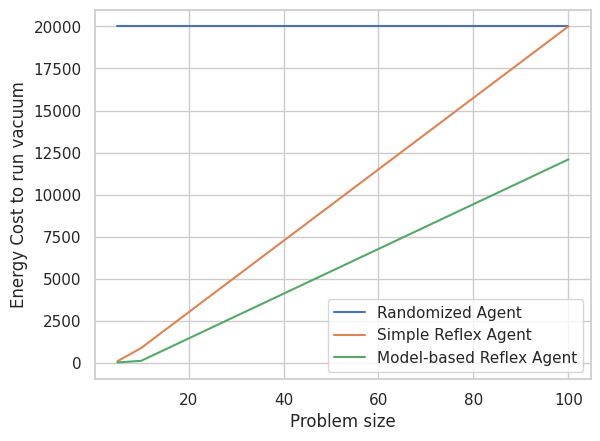

In [13]:
x = [5, 10, 100]
plt.plot(x, df["Randomized Agent"], label = "Randomized Agent")
plt.plot(x, df["Simple Reflex Agent"], label = "Simple Reflex Agent")
plt.plot(x, df["Model-based Reflex Agent"], label = "Model-based Reflex Agent")
plt.xlabel("Problem size")
plt.ylabel("Energy Cost to run vacuum")
plt.legend()
plt.show()

This graph doesn't perfectly show it due to the straight lines due to only 3 averages for the 3 agents but the Model-based Reflex Agent's energy output grows quadratically while the Simple Reflex Agent's energy output tends to grow cubically.

In [14]:
import pandas as pd
import numpy as np

simple_reflex_agent_energy_output = {
    "5x5" : [0] * 10,
    "10x10" : [0] * 10,
    "15x15" : [0] * 10
}
simple_reflex_agent_energy_output_averages = {
    "Size" : ["5x5", "10x10", "15x15"],
    "Energy Output" : [0, 0, 0]
}

for i in range(10):
    simple_reflex_agent_energy_output["5x5"][i] = environment(simple_reflex_agent, max_steps = 10000, room_size = 5, to_print = False, set_obstacles = False)
    simple_reflex_agent_energy_output["10x10"][i] = environment(simple_reflex_agent, max_steps = 10000, room_size = 10, to_print = False, set_obstacles = False)
    simple_reflex_agent_energy_output["15x15"][i] = environment(simple_reflex_agent, max_steps = 10000, room_size = 15, to_print = False, set_obstacles = False)
simple_reflex_agent_energy_output_averages["Energy Output"][0] = np.mean(simple_reflex_agent_energy_output["5x5"])
simple_reflex_agent_energy_output_averages["Energy Output"][1] = np.mean(simple_reflex_agent_energy_output["10x10"])
simple_reflex_agent_energy_output_averages["Energy Output"][2] = np.mean(simple_reflex_agent_energy_output["15x15"])

simple_reflex_df = pd.DataFrame(simple_reflex_agent_energy_output_averages)
simple_reflex_df

,Size,Energy Output
0,5x5,108.0
1,10x10,694.4
2,15x15,2670.4


Notice how the Energy output from is roughly 8 times the output when it doubles from room_size = 5 to room_size = 10 and is close to 27 times the output when room_size triples from 5 to 15. Therefore, it's most likely cubic.

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

### Task 5 Response

**Rectangular room with unkown size:** If the agents were placed into rectangular rooms with unknown size then they would all perform similarly to how they perform in the square rooms.
- The simple random agent would only clean the room if it were lucky. As a matter of fact, that luck never helped it with my runs for the square room so it will most likely never fully clean a room.
- The simple reflex agent would fully clean smaller rooms most times as it already does for the square rooms.
- The model-based agent would be able to clean any room with energy consumption of roughly O(n^2).

**Area with irregular shape:** If the agents were placed into rooms with irregular shapes then the 2 simple agents would perform better than the model-based agent in certain situations.
- The simple random agent would still most likely not work as it already hasn't for the basic square room.
- The simple reflex agent would still work for smaller awkward shaped rooms. The benefit it has over the others is that if left to run forever then it will eventually reach all the squares.
- The model-based agent would be able to clean any room that is taller on the left than it is on the right and only if it were randomly placed on the left most side. For example, if the room has 5 squares for the first 2 columns, followed by 3 squares for the next 2 columns, then 1 for 2 columns, the agent would clean it just fine if it were randomly placed within the first 2 columns for the starting position (See Figure A). If it's placed on the 3rd column then the the top 2 rows of the first 2 columns would never be cleaned. See the diagram and starting position below. However, if there is only 1 column of each height and the heights go 5, 4, 3, 2, 1 then it would fail to search all squares. (See Figure B, notice how the square at (1,1) is skipped.)

**Figure A**

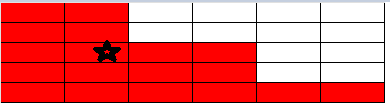

**Figure B**

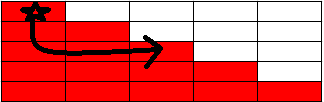

**Room with obstacles:** If the agents were placed into rooms with obstacles then the model-based agent would potentially perform the worst.
- The simple random agent already barely functions and would continue to be as useless or useful as before.
- The simple reflex agent would fully clean smaller rooms most times for similar reasons as was it's case for the awkwardly shaped rooms. It is bound to randomly move around objects at some point.
- The model-based agent would be guaranteed to miss whole portions of the room. The moment it hit an obstacle in the middle of the room it would never clean the leftover row beyond it and would miss parts of the row underneath it. It also has the danger of getting stuck in the middle of the room if there are 2 obstacles positioned diagonally to each other. This agent would only clean the whole room for very favorable situations, which would be less and less likely for larger rooms. However, it can fail for rooms of any size.

**Figure C**

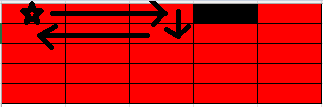

## Advanced task: Obstacles

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can.

In [15]:
# Your code and discussion goes here
obstacle_energy_output_5_by_5 = {
    "randomized" : [0] * 100,
    "simple reflex" : [0] * 100,
    "model based" : [0] * 100
}
obstacle_energy_output_10_by_10 = {
    "randomized" : [0] * 100,
    "simple reflex" : [0] * 100,
    "model based" : [0] * 100
}
obstacle_energy_output_100_by_100 = {
    "randomized" : [0] * 100,
    "simple reflex" : [0] * 100,
    "model based" : [0] * 100
}
obstacle_average_table = {
    "Size" : ["5x5", "10x10", "100x100"],
    "Randomized Agent" : [0, 0, 0],
    "Simple Reflex Agent" : [0, 0, 0],
    "Model-based Reflex Agent" : [0, 0, 0]
}


for i in range(100):
    model_agent = Model_Based_Agent()
    obstacle_energy_output_5_by_5["randomized"][i] = environment(simple_randomized_agent, max_steps = 20000, room_size = 5, to_print = False, set_obstacles = True)
    obstacle_energy_output_5_by_5["simple reflex"][i] = environment(simple_reflex_agent, max_steps = 20000, room_size = 5, to_print = False, set_obstacles = True)
    obstacle_energy_output_5_by_5["model based"][i] = environment(model_agent.act, max_steps = 20000, room_size = 5, to_print = False, set_obstacles = True)
obstacle_average_table["Randomized Agent"][0] = np.mean(obstacle_energy_output_5_by_5["randomized"])
obstacle_average_table["Simple Reflex Agent"][0] = np.mean(obstacle_energy_output_5_by_5["simple reflex"])
obstacle_average_table["Model-based Reflex Agent"][0] = np.mean(obstacle_energy_output_5_by_5["model based"])

for i in range(100):
    model_agent = Model_Based_Agent()
    obstacle_energy_output_10_by_10["randomized"][i] = environment(simple_randomized_agent, max_steps = 20000, room_size = 10, to_print = False, set_obstacles = True)
    obstacle_energy_output_10_by_10["simple reflex"][i] = environment(simple_reflex_agent, max_steps = 20000, room_size = 10, to_print = False, set_obstacles = True)
    obstacle_energy_output_10_by_10["model based"][i] = environment(model_agent.act, max_steps = 20000, room_size = 10, to_print = False, set_obstacles = True)
obstacle_average_table["Randomized Agent"][1] = np.mean(obstacle_energy_output_10_by_10["randomized"])
obstacle_average_table["Simple Reflex Agent"][1] = np.mean(obstacle_energy_output_10_by_10["simple reflex"])
obstacle_average_table["Model-based Reflex Agent"][1] = np.mean(obstacle_energy_output_10_by_10["model based"])

for i in range(100):
    model_agent = Model_Based_Agent()
    obstacle_energy_output_100_by_100["randomized"][i] = environment(simple_randomized_agent, max_steps = 20000, room_size = 100, to_print = False, set_obstacles = True)
    obstacle_energy_output_100_by_100["simple reflex"][i] = environment(simple_reflex_agent, max_steps = 20000, room_size = 100, to_print = False, set_obstacles = True)
    obstacle_energy_output_100_by_100["model based"][i] = environment(model_agent.act, max_steps = 20000, room_size = 100, to_print = False, set_obstacles = True)
obstacle_average_table["Randomized Agent"][2] = np.mean(obstacle_energy_output_100_by_100["randomized"])
obstacle_average_table["Simple Reflex Agent"][2] = np.mean(obstacle_energy_output_100_by_100["simple reflex"])
obstacle_average_table["Model-based Reflex Agent"][2] = np.mean(obstacle_energy_output_100_by_100["model based"])

obstacle_df = pd.DataFrame(obstacle_average_table)
obstacle_df

I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I am now in cleaning mode.
I

,Size,Randomized Agent,Simple Reflex Agent,Model-based Reflex Agent
0,5x5,19999.0,2901.01,17601.63
1,10x10,19999.0,5154.72,19999.00
2,100x100,19999.0,19999.00,19999.00


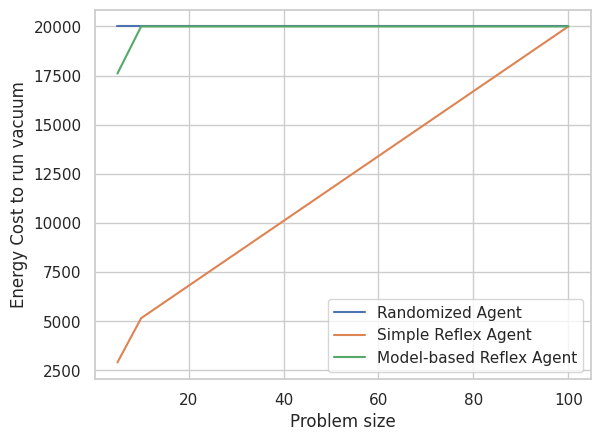

In [16]:
x = [5, 10, 100]
plt.plot(x, obstacle_df["Randomized Agent"], label = "Randomized Agent")
plt.plot(x, obstacle_df["Simple Reflex Agent"], label = "Simple Reflex Agent")
plt.plot(x, obstacle_df["Model-based Reflex Agent"], label = "Model-based Reflex Agent")
plt.xlabel("Problem size")
plt.ylabel("Energy Cost to run vacuum")
plt.legend()
plt.show()

The table and graph assert my assumptions made in Task 5 response. The Randomized Agent continues to fail. The Simple Reflex Agent cleans the rooms when they're smaller but runs out of steam for the large 100x100 rooms like it did before. The Model-based Reflex Agent performed significantly worse across the board. It managed to clean the 5x5 rooms sometimes but from the average Energy output I'm going to say it looks like it got stuck or failed to clean the room around 85% to 90% of the time. Let's dive into that more.

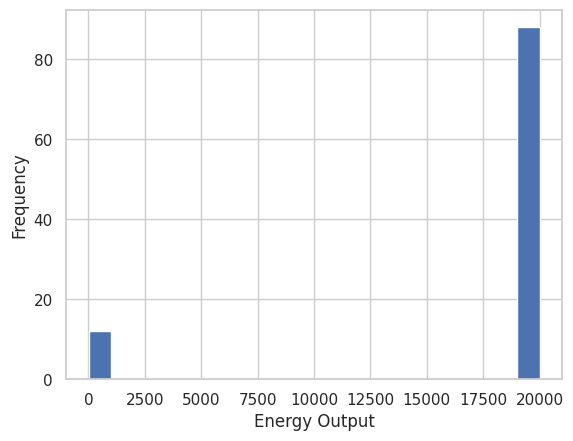

In [17]:
#output_of_5x5_df = pd.DataFrame(obstacle_energy_output_5_by_5)
plt.hist(obstacle_energy_output_5_by_5["model based"], bins = 20)
plt.xlabel("Energy Output")
plt.ylabel("Frequency")
plt.show()

As expected from looking at the average energy output the Model-based Reflex Agent gets stuck aroun 85 to 90% of the time in 5x5 rooms with obstacles. This is a fairly abysmal showing considering how well it performed without any obstacles.

One solution that I thought of for this problem was to create a stack to hold movements whenever an object was ran into. For example, my Model-based Reflex agent starts going east, then down, then west, then down, then east, etc. If the agent hit an obstacle while going east then it would stack.push("north") and stack.push("east") and then it would return("south"). If the agent were called and the stack was not empty then it would return(stack.pop()). That way it would move down and around the object and then continue on it's way. The tricky part would be what if the obstacles cornered you somewhere? I would have to implement code to go up and around instead.

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [18]:
# Your ideas/code

#I did not implement any of these.

!pip install nbconvert

from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/robot_vacuum.ipynb


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/robot_vacuum.ipynb to html
[NbConvertApp] Writing 791795 bytes to /content/drive/MyDrive/Colab Notebooks/robot_vacuum.html
